In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('./movies.csv')
df.head(10)

In [ ]:
df_good = df[df['title'].isin(['Waiting to Exhale (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)'])]
df_bad = df[df['title'].isin(['Bungo Stray Dogs: Dead Apple (2018)', 'Andrew Dice Clay: Dice Rules (1991)', 'Black Butler: Book of the Atlantic (2017)'])]

In [ ]:
df_good['type'] = 'like'
df_bad['type'] = 'dont like'

In [ ]:
df_films = df_bad.append(df_good)

In [ ]:
df_ratings = pd.read_csv('./ratings.csv')

In [ ]:
df_ratings = df_ratings.groupby('movieId').mean()['rating']

In [ ]:
df_ratings.reset_index(level=0)

In [ ]:
df_films = df_films.merge(right=df_ratings, how='inner', on='movieId')

In [ ]:
# df_films = df_films.groupby(by='movieId').first()

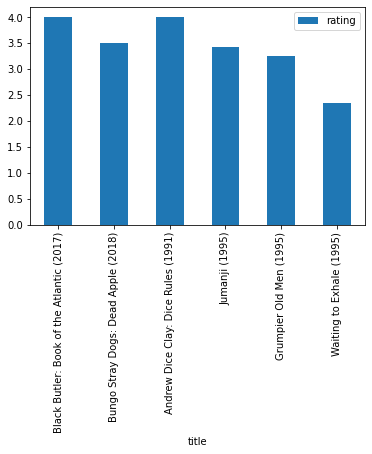

In [ ]:
df_films.plot(kind='bar', y='rating', x='title', legend='type')

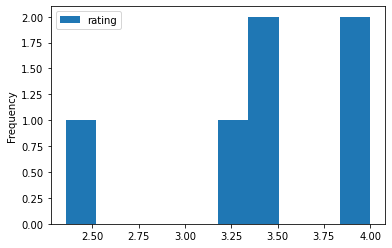

In [ ]:
df_films.plot(kind='hist', y='rating', x='title')

In [ ]:
!pip install seaborn==0.11
import seaborn as sns 

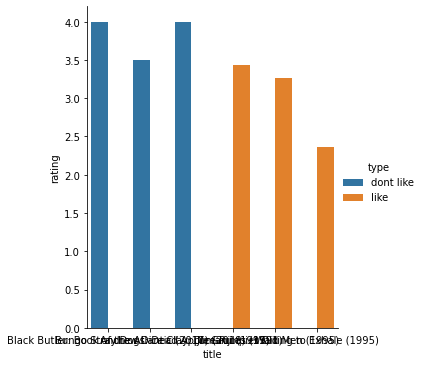

In [ ]:
sns.catplot(data=df_films, kind='bar', x='title', y='rating', hue='type')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


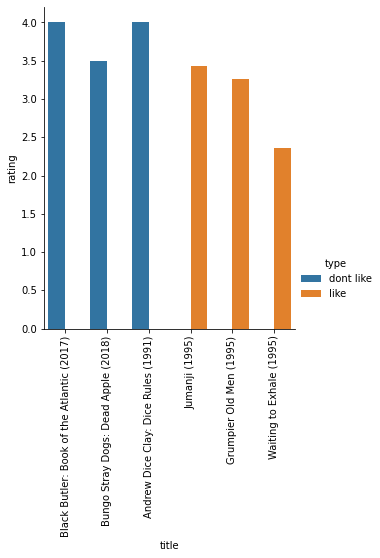

In [ ]:
fig = sns.catplot(data=df_films, kind='bar', x='title', y='rating', hue='type', ax=ax)
fig.set_xticklabels(df_films['title'], rotation=90)